In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


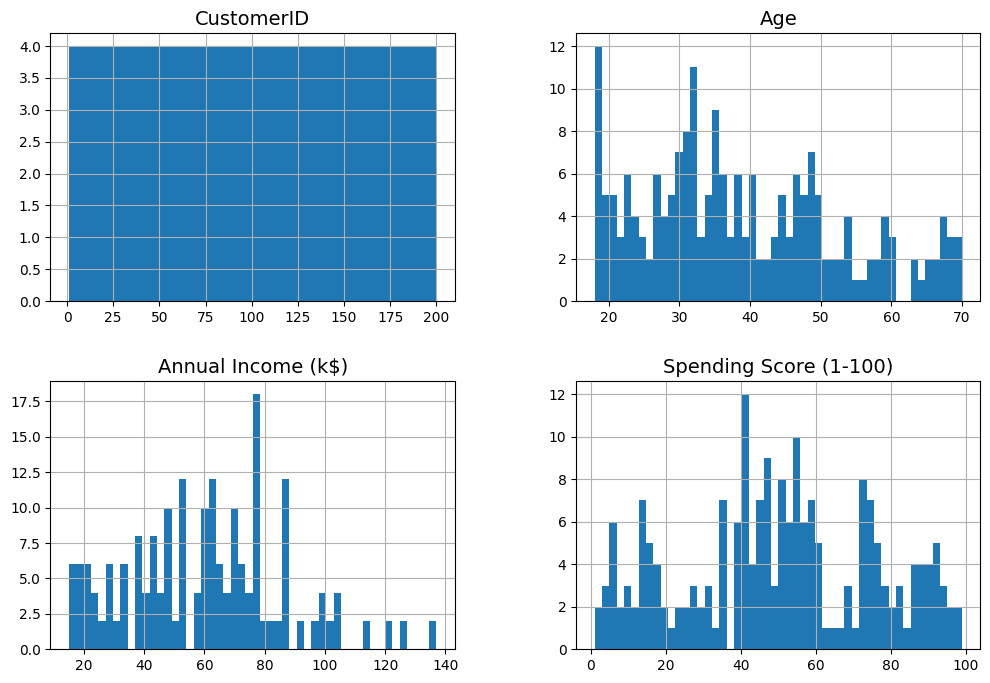

In [6]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.show()

In [7]:
df['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

# EDA and Preprocessing

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

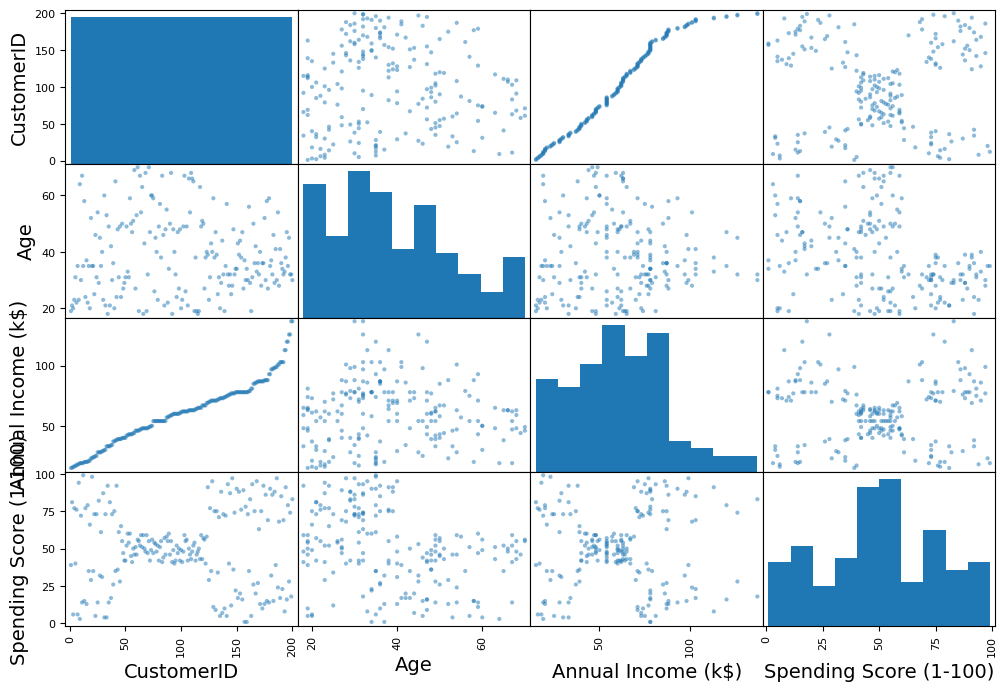

In [9]:
from pandas.plotting import scatter_matrix
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)
scatter_matrix(df[num_col], figsize=(12, 8))
plt.show()

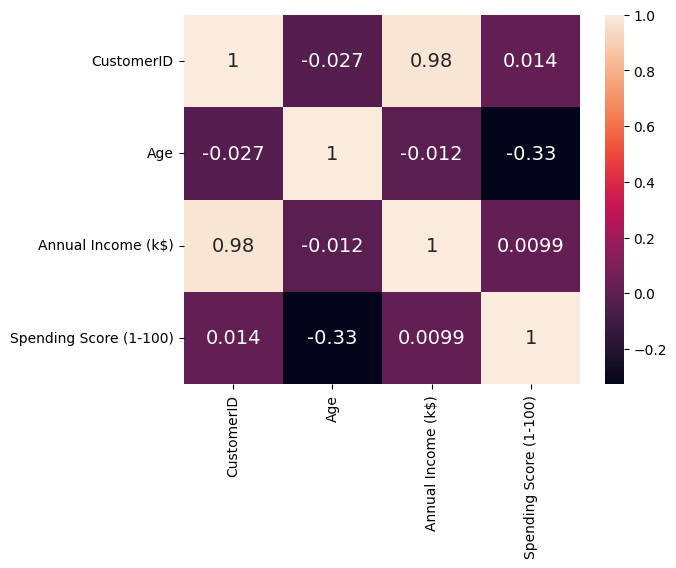

In [10]:
# plt.figure(figsize=(10,20))
sns.heatmap(data=df[num_col].corr(),annot=True)
plt.show()

In [17]:
# from sklearn.preprocessing import LabelEncoder
# label=LabelEncoder()
# df['Gender']=label.fit_transform(df['Gender'])

In [20]:
# from sklearn.preprocessing import MinMaxScaler

# minmax=MinMaxScaler()

# minmax_scaled=minmax.fit_transform()

In [19]:
# from sklearn.preprocessing import RobustScaler

# scale=RobustScaler()

# df_scaled=scale.fit_transform(df)



[[-1.          1.         -0.83950617 -1.2739726  -0.2875817 ]
 [-0.98994975  1.         -0.74074074 -1.2739726   0.81045752]
 [-0.9798995   0.         -0.79012346 -1.24657534 -1.1503268 ]
 [-0.96984925  0.         -0.64197531 -1.24657534  0.70588235]
 [-0.95979899  0.         -0.24691358 -1.21917808 -0.26143791]
 [-0.94974874  0.         -0.69135802 -1.21917808  0.67973856]
 [-0.93969849  0.         -0.04938272 -1.19178082 -1.1503268 ]
 [-0.92964824  0.         -0.64197531 -1.19178082  1.1503268 ]
 [-0.91959799  1.          1.38271605 -1.16438356 -1.22875817]
 [-0.90954774  0.         -0.2962963  -1.16438356  0.5751634 ]
 [-0.89949749  1.          1.5308642  -1.16438356 -0.94117647]
 [-0.88944724  0.         -0.04938272 -1.16438356  1.28104575]
 [-0.87939698  0.          1.08641975 -1.1369863  -0.91503268]
 [-0.86934673  0.         -0.59259259 -1.1369863   0.70588235]
 [-0.85929648  1.          0.04938272 -1.1369863  -0.96732026]
 [-0.84924623  1.         -0.69135802 -1.1369863   0.75

In [83]:
X=df.iloc[:,3:5]


# Clustering

Text(0, 0.5, 'Inertia')

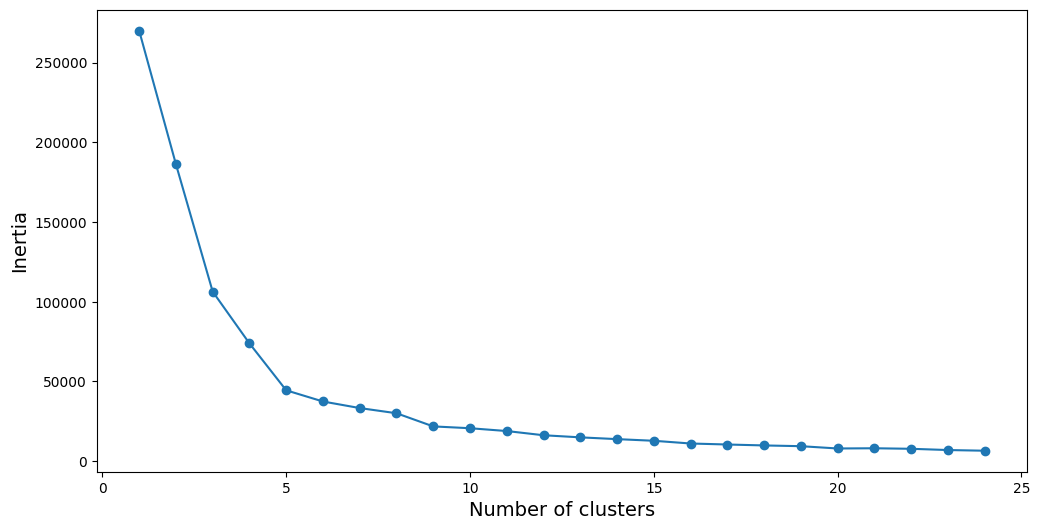

In [101]:
wss=[]
for cluster in range(1,25):
    kmeans=KMeans(n_clusters=cluster,init='k-means++')
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

frame=pd.DataFrame({'cluster':range(1,25),'WSS':wss})


plt.figure(figsize=(12,6))
plt.plot(frame['cluster'], frame['WSS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [105]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_pred = kmeans.fit_predict(X)


In [103]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


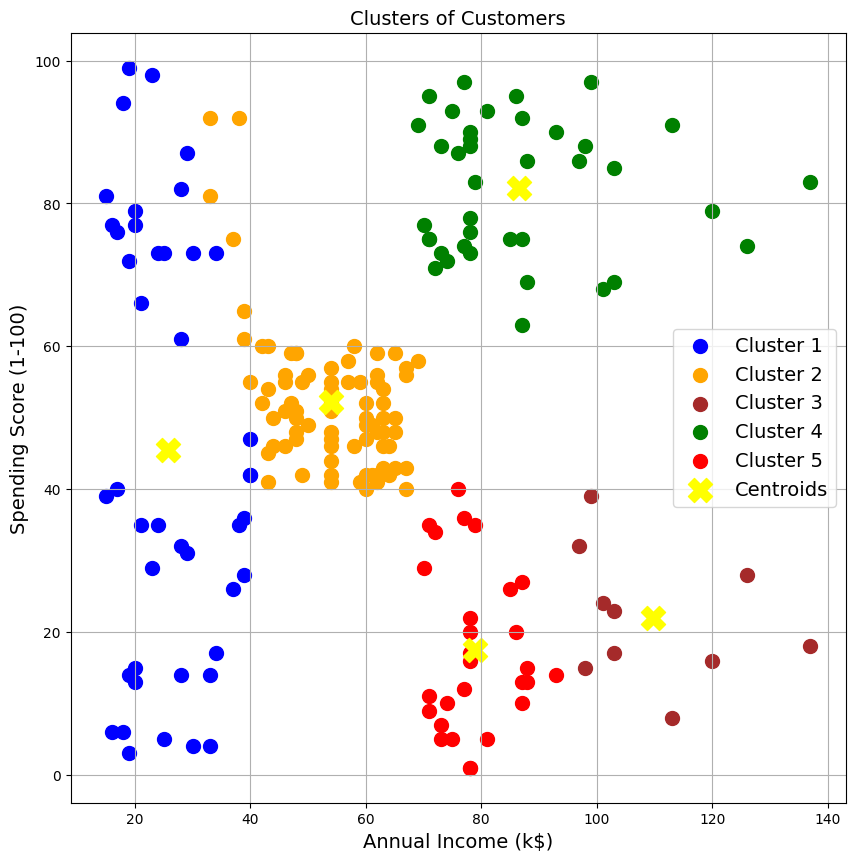

In [106]:
plt.figure(figsize=(10,10))
# Plotting each cluster with different colors
plt.scatter(X[y_pred == 0].iloc[:, 0], X[y_pred == 0].iloc[:, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X[y_pred == 1].iloc[:, 0], X[y_pred == 1].iloc[:, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X[y_pred == 2].iloc[:, 0], X[y_pred == 2].iloc[:, 1], s=100, c='brown', label='Cluster 3')
plt.scatter(X[y_pred == 3].iloc[:, 0], X[y_pred == 3].iloc[:, 1], s=100, c='green', label='Cluster 4')
plt.scatter(X[y_pred == 4].iloc[:, 0], X[y_pred == 4].iloc[:, 1], s=100, c='red', label='Cluster 5')


# Plotting centroids (kept yellow for centroids)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='X')

# Adding titles and labels
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

**Cluster1 shows the customers with average salary and average spending so we can categorize these customers.**
**Cluster2 shows the customer has a high income but low spending, so we can categorize them as careful.**
**Cluster3 shows the low income and also low spending so they can be categorized as sensible.**
**Cluster4 shows the customers with low income with very high spending so they can be categorized as careless.**
**Cluster5 shows the customers with high income and high spending so they can be categorized as target, and these customers can be the most profitable customers for the mall owner.**